In [1]:
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
%matplotlib inline
seed = 0
np.random.seed(seed)
import tensorflow as tf
tf.random.set_seed(seed)
import os
#os.environ['PATH'] = '/opt/Xilinx/Vivado/2019.2/bin:' + os.environ['PATH']

2025-09-18 06:02:40.111287: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = fetch_openml('hls4ml_lhc_jets_hlf')
X, y = data['data'], data['target']

In [3]:
print(data['feature_names'])
print(X.shape, y.shape)
print(X[:5])
print(y[:5])

['zlogz', 'c1_b0_mmdt', 'c1_b1_mmdt', 'c1_b2_mmdt', 'c2_b1_mmdt', 'c2_b2_mmdt', 'd2_b1_mmdt', 'd2_b2_mmdt', 'd2_a1_b1_mmdt', 'd2_a1_b2_mmdt', 'm2_b1_mmdt', 'm2_b2_mmdt', 'n2_b1_mmdt', 'n2_b2_mmdt', 'mass_mmdt', 'multiplicity']
(830000, 16) (830000,)
      zlogz  c1_b0_mmdt  c1_b1_mmdt  c1_b2_mmdt  c2_b1_mmdt  c2_b2_mmdt  \
0 -2.935125    0.383155    0.005126    0.000084    0.009070    0.000179   
1 -1.927335    0.270699    0.001585    0.000011    0.003232    0.000029   
2 -3.112147    0.458171    0.097914    0.028588    0.124278    0.038487   
3 -2.666515    0.437068    0.049122    0.007978    0.047477    0.004802   
4 -2.484843    0.428981    0.041786    0.006110    0.023066    0.001123   

   d2_b1_mmdt  d2_b2_mmdt  d2_a1_b1_mmdt  d2_a1_b2_mmdt  m2_b1_mmdt  \
0    1.769445    2.123898       1.769445       0.308185    0.135687   
1    2.038834    2.563099       2.038834       0.211886    0.063729   
2    1.269254    1.346238       1.269254       0.246488    0.115636   
3    0.966505  

In [4]:
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y, 5)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y[:5])

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]


In [5]:
scaler = StandardScaler()
X_train_val = scaler.fit_transform(X_train_val)
X_test = scaler.transform(X_test)

In [6]:
np.save('X_train_val.npy', X_train_val)
np.save('X_test.npy', X_test)
np.save('y_train_val.npy', y_train_val)
np.save('y_test.npy', y_test)
np.save('classes.npy', le.classes_)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
# from callbacks import all_callbacks

2025-09-15 02:54:40.008437: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


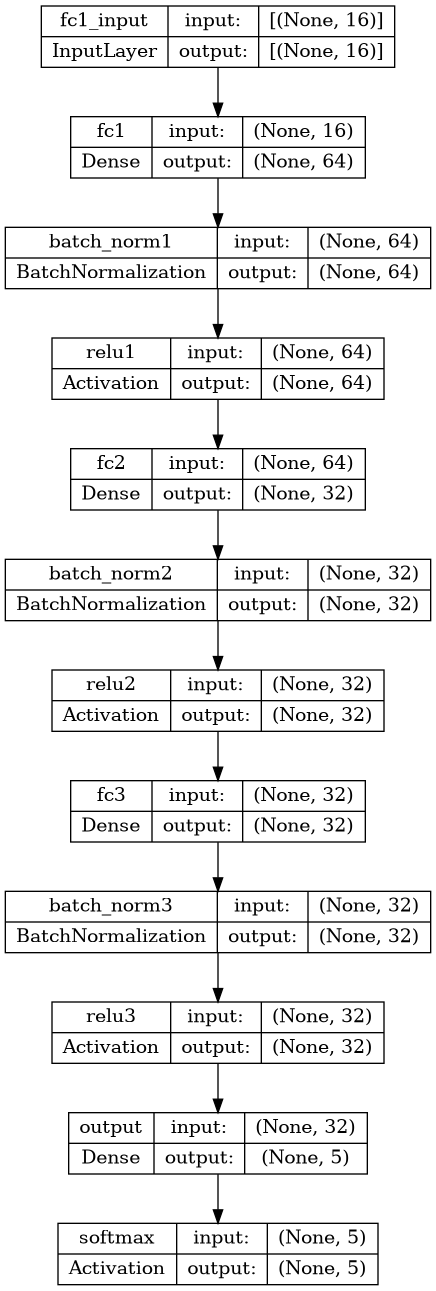

In [2]:
# from keras.utils.vis_utils import plot_model

model = load_model('model.h5', compile=False)
plot_model(model, show_shapes=True, show_layer_names=True)

## Checking intermediary values

In [7]:
TOTAL_BITS = 16
FRACTIONAL_BITS = 10

# Generate random test inputs
num_cases = 7  # Number of test cases
# set seed for reproducibility
np.random.seed(0)

# Get x_train_val and y_train_val
X_train_val = np.load('X_train_val.npy')
y_train_val = np.load('y_train_val.npy')

# randomly sample num_cases data points
test_indices = np.random.choice(X_train_val.shape[0], num_cases, replace=False)
test_inputs = X_train_val[test_indices]
test_outputs = y_train_val[test_indices]
# test_inputs = [np.random.uniform(-10, 10, (16,)) for _ in range(num_cases)]

In [16]:
from tensorflow.keras.models import load_model
import numpy as np
model = load_model("model.h5")  # or however you build it
layer = model.get_layer(index=0)  # by name or index

weights, biases = layer.get_weights()
#print("Weights shape:", weights.shape)  # (input_dim, output_dim)
#print("Biases shape:", biases.shape)    # (output_dim)
#print("Weights:", weights)
print(np.array(biases)*(2**10))


[ -0.7613099  -11.159238     3.6769547   -2.205409    -2.0966291
  -5.5806794   17.52811     -0.03957479  -1.8392991   -0.86028063
   2.3564897    2.0582464   -1.6040729   -0.10676797   0.2774113
  -1.2504815    1.8472592   -1.2846855   -2.0258594   -1.853095
   8.331394     1.4828316   -2.1144958   -0.76563966  -2.2274373
  -0.23691884  -5.316116    -0.1884699   -4.2356386   -0.9173611
  -0.38826534  -3.3806381   -1.7531759    1.9565094    3.032278
  -1.8402585   -0.6575714   -2.589081    -1.3839273    1.8784835
  -2.382466    17.556572    -5.9359245   -0.82359076   3.1173632
  -0.4655991   -1.3911055   -0.27575696   2.129846     2.3177564
   1.8420266    0.3402475    2.2003636    2.0227294   -1.7105443
   0.9197296   -2.6893241    2.2541704   -1.9240724    2.4238067
  -0.3085863    4.866175    -1.8977684   -2.4328449 ]


In [23]:
import hls4ml, yaml
config = hls4ml.utils.config_from_keras_model(model, granularity='name')
with open('hls_config.yml', 'w') as f:
    yaml.dump({'HLSConfig': config}, f, sort_keys=False)



# Compiling

In [ ]:
import hls4ml
from tensorflow.keras.models import load_model
import yaml

with open('hls_config.yml', 'r') as f:
    yaml_config = yaml.safe_load(f)['HLSConfig']

TOTAL_BITS=16
FRACTIONAL_BITS=10
model = load_model('model.h5', compile=False)
config = hls4ml.utils.config_from_keras_model(model, granularity='name')
# config['Model']['Precision'] = 'ap_fixed<22,11>'
config['Model']['Precision'] = f'ap_fixed<{TOTAL_BITS},{TOTAL_BITS - FRACTIONAL_BITS}>'
# config['Model']['Strategy'] = 'Resource'
config['LayerName']['softmax']['exp_table_t'] = 'ap_fixed<18,8>'
config['LayerName']['softmax']['inv_table_t'] = 'ap_fixed<18,4>'
# config['LayerName']['fc1']['Precision']['bias'] = f'ap_fixed<{TOTAL_BITS},{FRACTIONAL_BITS}>'
print("-----------------------------------")
hls_model = hls4ml.converters.convert_from_keras_model(model,
                                                       backend='Vivado',
                                                       hls_config=config,
                                                    #    output_dir='model_4/hls4ml_prj',
                                                       output_dir=f'model_5/{TOTAL_BITS}_{TOTAL_BITS-FRACTIONAL_BITS}_prj_test',
                                                      #  part='xcu280-fsvh2892-2L-e')
                                                      part='xc7vx690tffg1761-2')
hls_model.build(csim=True, synth=True, vsynth=True, export=True)
hls_model.compile()

2025-10-05 14:52:55.787545: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


-----------------------------------


2025-10-05 14:52:57.414126: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.



****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2019.1 (64-bit)
  **** SW Build 2552052 on Fri May 24 14:47:09 MDT 2019
  **** IP Build 2548770 on Fri May 24 18:01:18 MDT 2019
    ** Copyright 1986-2019 Xilinx, Inc. All Rights Reserved.

source /tools/Xilinx/Vivado/2019.1/scripts/vivado_hls/hls.tcl -notrace
INFO: [HLS 200-10] Running '/tools/Xilinx/Vivado/2019.1/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'caleb' on host 'hvm1' (Linux_x86_64 version 5.15.0-157-generic) on Sun Oct 05 14:53:00 PDT 2025
INFO: [HLS 200-10] On os Ubuntu 22.04.5 LTS
INFO: [HLS 200-10] In directory '/home/caleb/HLS4ML_VS_MANUAL/src/hdl/Batchnorm-JetTagging/python/model_5/16_6_prj_test'
Sourcing Tcl script 'build_prj.tcl'
INFO: [HLS 200-10] Creating and opening project '/home/caleb/HLS4ML_VS_MANUAL/src/hdl/Batchnorm-JetTagging/python/model_5/16_6_prj_test/myproject_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/myproject.cpp' to the project
INFO: [HLS 200-10] Add

In [3]:
import hls4ml
hls4ml.report.read_vivado_report(f'model_5/16_6_prj_25')

Found 1 solution(s) in model_5/16_6_prj_25/myproject_prj.
Reports for solution "solution1":

C SIMULATION RESULT:
INFO: [SIM 2] *************** CSIM start ***************
INFO: [SIM 4] CSIM will launch GCC as the compiler.
   Compiling ../../../../myproject_test.cpp in debug mode
   Compiling ../../../../firmware/myproject.cpp in debug mode
   Generating csim.exe
INFO: Unable to open input/predictions file, using default input.
0.0166016 0.102539 0.27832 0.143555 0.571289 
0.0166016 0.102539 0.27832 0.143555 0.571289 
0.0166016 0.102539 0.27832 0.143555 0.571289 
0.0166016 0.102539 0.27832 0.143555 0.571289 
0.0166016 0.102539 0.27832 0.143555 0.571289 
INFO: Saved inference results to file: tb_data/csim_results.log
INFO: [SIM 1] CSim done with 0 errors.
INFO: [SIM 3] *************** CSIM finish ***************

SYNTHESIS REPORT:
== Vivado HLS Report for 'myproject'
* Date:           Sat Oct  4 23:13:14 2025

* Version:        2019.1 (Build 2552052 on Fri May 24 15:28:33 MDT 2019)
* Pr

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
y_test = np.load('y_test.npy')
hls_res =  np.loadtxt("./model_5/16_6_prj_25/myproject_prj/solution1/impl/verilog/hls_results.csv", delimiter=",")
hand_res =  np.loadtxt("./results.csv", delimiter=",")
hls_res = hls_res[1:]
acc_hls= accuracy_score((y_test[0:len(hls_res)]).argmax(axis=1), hls_res.argmax(axis=1))
acc_hand=accuracy_score((y_test[0:len(hand_res)]).argmax(axis=1), hand_res.argmax(axis=1))
print("Accuracy HLS: ", acc_hls, "\nAccuracy Handmade: ", acc_hand)
print(hls_res[0:40].argmax(axis=1))
print(y_test[0:40].argmax(axis=1))

Accuracy HLS:  0.7638901439165297 
Accuracy Handmade:  0.7654698795180723
[0 1 2 2 2 2 1 0 1 3 1 3 3 4 2 0 3 4 4 0 2 1 1 1 1 3 0 1 2 1 1 1 3 2 1 3 2
 0 1 3]
[1 1 2 2 2 2 1 0 4 3 1 3 3 2 2 0 3 4 4 0 2 1 0 2 1 3 0 1 2 1 1 1 3 2 1 3 1
 0 3 3]


In [17]:
import numpy as np
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')
res_keras = model.predict(X_test)
res_hls4ml = hls_model.predict(np.ascontiguousarray(X_test))
from sklearn.metrics import accuracy_score
acc_hls = accuracy_score(y_test.argmax(axis=1), res_hls4ml.argmax(axis=1))
acc_keras = accuracy_score(y_test.argmax(axis=1), res_keras.argmax(axis=1))
handmade_data = np.loadtxt("out_results.csv", delimiter=",")
old_handmade_data = np.loadtxt("old_results.csv", delimiter=",")
acc_handmade = accuracy_score((y_test[0:len(handmade_data)]).argmax(axis=1), handmade_data.argmax(axis=1))
acc_handmade_old = accuracy_score((y_test[0:len(old_handmade_data)]).argmax(axis=1), old_handmade_data.argmax(axis=1))

5188/5188 [==============================] - 7s 1ms/step


In [18]:
print(f"Keras Accuracy: {acc_keras}\nHLS4ML Accuracy: {acc_hls}\nHandmade Accuracy: {acc_handmade}\nOld Handmade Accuracy: {acc_handmade_old}")

Keras Accuracy: 0.7668734939759037
HLS4ML Accuracy: 0.6262168674698795
Handmade Accuracy: 0.6341558950254602
Old Handmade Accuracy: 0.617


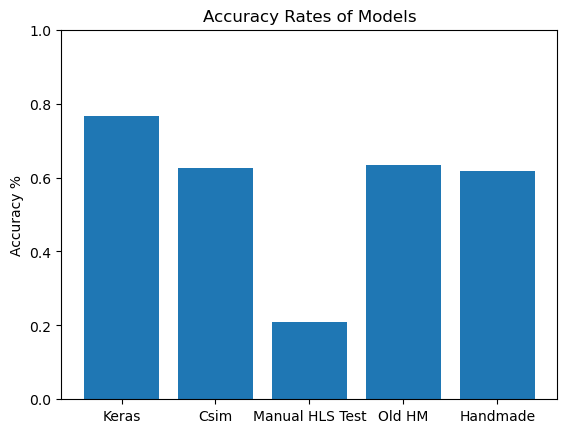

In [26]:
import matplotlib.pyplot as plt
a=0.7668734939759037
b=0.6262168674698795
c=0.6341558950254602
d=0.617
e=.21
plt.bar(["Keras", "Csim", "Manual HLS Test" , "Old HM", "Handmade"],[a, b, e, c, d], label="Accuracy of Models")
plt.ylabel("Accuracy %")
plt.title("Accuracy Rates of Models")
plt.ylim(0,1)
plt.show()

In [ ]:
from pprint import pprint
pprint(config)

{'Model': {'BramFactor': 1000000000,
           'Precision': 'ap_fixed<16,10>',
           'ReuseFactor': 1,
           'Strategy': 'Latency',
           'TraceOutput': False}}


# Other

In [ ]:
debug = False

# Define constants for fixed-point arithmetic

SCALE = 2**FRACTIONAL_BITS  # Scaling factor for fractional bits
RANGE_MIN = -2**(TOTAL_BITS - FRACTIONAL_BITS - 1)  # Minimum representable value
RANGE_MAX = 2**(TOTAL_BITS - FRACTIONAL_BITS - 1) - 1 / SCALE  # Maximum representable value

np.set_printoptions(precision=8, suppress=True)

# Function to quantize a value to fixed-point resolution
def quantize_to_fixed_point(values, scale, range_min, range_max):
    quantized = np.round(values * scale) / scale  # Quantize to fractional steps
    return np.clip(quantized, range_min, range_max)  # Clip to representable range


# Define a TensorFlow model (replace this with your actual model

# Ensure that the model has been compiled and built
if not model.built:
    model.build(input_shape=(None, model.input_shape[1]))

# Get the output of the layer before softmax (assumed to be the Dense layer called 'output')
# output_layer_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)

# More test cases
more_test_inputs = [
    np.ones((model.input_shape[1],)),  # All ones input
    np.zeros((model.input_shape[1],)),  # All zeros input
    # Add more test inputs here as needed
]

# Quantize the test inputs
quantized_inputs = [quantize_to_fixed_point(inp, SCALE, RANGE_MIN, RANGE_MAX) for inp in test_inputs]


layer_outputs = [layer.output for layer in model.layers]
intermediate_models = [
    tf.keras.Model(inputs=model.input, outputs=model.layers[i].output)
    for i in range(len(model.layers))
]

if debug:
    print("=" * 50)
    print(model.summary())
    print("=" * 50)


    for intermediate_model in intermediate_models:
        print(intermediate_model.summary())

# Run the test inputs through the model
results = []
for i, (original, quantized) in enumerate(zip(test_inputs, quantized_inputs)):
    original_reshaped = original.reshape((1, 16))  # Reshape to (1, 16)
    
    if debug:
        print(original_reshaped.shape)
    
    original_outputs = [intermediate_model(original_reshaped).numpy() for intermediate_model in intermediate_models]
    quantized_outputs = [intermediate_model(np.expand_dims(quantized, axis=0)).numpy() for intermediate_model in intermediate_models]
    hls_output = hls_model.predict(np.expand_dims(original, axis=0))

    results.append({
        "test_case": i + 1,
        "original_input": original,
        "quantized_input": quantized,
        "original_layer_outputs": original_outputs,
        "quantized_layer_outputs": quantized_outputs,
        "hls_output": hls_output
    })

# Print the results
print(f"Nfrac = {FRACTIONAL_BITS}, Nbits = {TOTAL_BITS}")

for result, test_output in zip(results, test_outputs):
    original_input = result["original_input"]
    quantized_input = result["quantized_input"]

    # Generate Verilog representation of quantized input
    verilog_input = ", ".join([
        f"{'-' if value < 0 else ''}{TOTAL_BITS}'d{int(abs(value) * SCALE)}"
        for value in quantized_input
    ])
    verilog_line = f"input_data = '{{ {verilog_input} }};"

    # Print test case details
    print(f"Test Case {result['test_case']}:")
    print("Original Input:", original_input)
    print("Quantized Input:", quantized_input)

    # Print outputs for each layer
    print("\nLayer Outputs:")
    for layer_index, (original_output, quantized_output) in enumerate(zip(result["original_layer_outputs"], result["quantized_layer_outputs"])):
        layer_name = model.layers[layer_index].name
        print(f"Layer {layer_index + 1} ({layer_name}):")
        print("  Original Output:", original_output)
        print("  Quantized Output:", quantized_output)
        
    print("\nHLS Output:")
    print(result["hls_output"])
    
    # Print expected output
    print("\nExpected Output:")
    print(test_output)

    # Print Verilog representation
    print("\nVerilog Input:")
    print(verilog_line)
    print("-" * 50)

Nfrac = 10, Nbits = 16
Test Case 1:
Original Input: [-0.5828335   0.49684883 -0.01840194 -0.24045882  0.45094865 -0.07771909
  0.86848911  0.10791043  0.86848911  0.14491933 -0.00588726 -0.34130106
  0.5305878  -0.01985769  0.02133072  0.32723323]
Quantized Input: [-0.58300781  0.49707031 -0.01855469 -0.24023438  0.45117188 -0.078125
  0.86816406  0.10839844  0.86816406  0.14453125 -0.00585938 -0.34082031
  0.53027344 -0.01953125  0.02148438  0.32714844]

Layer Outputs:
Layer 1 (fc1):
  Original Output: [[-0.16040038  0.23987657 -0.37658423 -0.35861397 -0.00746266  0.33400446
   0.01265186 -0.20090431 -0.23094484  0.07019582 -0.13049212  0.20883499
   0.14462219 -0.25555778  0.47251913  0.39192244 -0.07916892 -0.03040214
   0.04339003  0.17110287  0.41694134  0.11701028  0.2439712   0.11100718
   0.13241413  0.210205   -0.08614396  0.0412487  -0.12223095  0.21280019
   0.24709864  0.1697331  -0.02018069  0.18233861  0.13818273  0.3535379
   0.21207228  0.04519686  0.07837883 -0.4187987

## HLS4ML stuff

In [1]:
import hls4ml
config = hls4ml.utils.config_from_keras_model(model, granularity='model')
# config['Model']['Precision'] = 'ap_fixed<22,11>'
config['Model']['Precision'] = 'ap_fixed<32,16>'
print("-----------------------------------")
hls_model = hls4ml.converters.convert_from_keras_model(model,
                                                       hls_config=config,
                                                    #    output_dir='model_4/hls4ml_prj',
                                                       output_dir='model_5/32_16_prj',
                                                       part='xc7vx690tffg1761-2')
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file=None)

2025-09-13 04:05:17.128407: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/caleb/miniconda3/envs/hls4ml-env/lib/python3.10/site-packages/hls4ml/converters/__init__.py:16: UserWarning: WARNING: Pytorch converter is not enabled!
  warnings.warn("WARNING: Pytorch converter is not enabled!")


NameError: name 'model' is not defined

In [12]:
hls_model.compile()

Writing HLS project


Done


### (Donovan) Get HLS4ML outputs

In [ ]:
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)
hls_y_pred = hls_model.predict(np.ascontiguousarray(X_test))
print("hls_y_pred.shape", hls_y_pred.shape)
print(type(hls_y_pred))

X_test.shape (166000, 16)
y_test.shape (166000, 5)
hls_y_pred.shape (166000, 5)
<class 'numpy.ndarray'>


In [ ]:
output = model.predict(X_test)
print(output.shape)
# print(output)
# print(hls_y_pred[0:5])

5188/5188 [==============================] - 9s 2ms/step
(166000, 5)


In [ ]:
# check if the max indicies are the same for the first 20 predictions
indices = np.argmax(output, axis=1)
hls_indices = np.argmax(hls_y_pred, axis=1)

print('indices.shape', indices.shape)
print('hls_indices.shape', hls_indices.shape)

print(indices[0:20])
print(hls_indices[0:20])

indices.shape (166000,)
hls_indices.shape (166000,)
[0 1 2 2 2 2 1 0 1 3 1 4 3 4 2 0 3 4 4 0]
[0 1 2 2 2 2 1 0 1 3 1 4 3 4 2 0 3 4 4 0]


In [ ]:
np.save('hls_y_pred.npy', hls_y_pred)
np.save('keras_y_pred.npy', output)
np.save('hls_max_indices.npy', hls_indices)
np.save('keras_max_indices.npy', indices)

### (Donovan) build the hls4ml model

In [9]:
hls_model.build(csim=False)


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2019.1 (64-bit)
  **** SW Build 2552052 on Fri May 24 14:47:09 MDT 2019
  **** IP Build 2548770 on Fri May 24 18:01:18 MDT 2019
    ** Copyright 1986-2019 Xilinx, Inc. All Rights Reserved.

source /tools/Xilinx/Vivado/2019.1/scripts/vivado_hls/hls.tcl -notrace
INFO: [HLS 200-10] Running '/tools/Xilinx/Vivado/2019.1/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'caleb' on host 'hvm1' (Linux_x86_64 version 5.15.0-153-generic) on Sat Sep 13 04:11:14 UTC 2025
INFO: [HLS 200-10] On os Ubuntu 22.04.5 LTS
INFO: [HLS 200-10] In directory '/home/caleb/HLS4ML_VS_MANUAL/src/hdl/Batchnorm-JetTagging/python/model_5/16_10_prj'
Sourcing Tcl script 'build_prj.tcl'
INFO: [HLS 200-10] Opening project '/home/caleb/HLS4ML_VS_MANUAL/src/hdl/Batchnorm-JetTagging/python/model_5/16_10_prj/myproject_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/myproject.cpp' to the project
INFO: [HLS 200-10] Adding test bench file '

{'EstimatedClockPeriod': '4.890',
 'BestLatency': '25',
 'WorstLatency': '25',
 'IntervalMin': '1',
 'IntervalMax': '1',
 'BRAM_18K': '4',
 'DSP48E': '775',
 'FF': '56577',
 'LUT': '123677',
 'URAM': '0',
 'AvailableBRAM_18K': '2940',
 'AvailableDSP48E': '3600',
 'AvailableFF': '866400',
 'AvailableLUT': '433200',
 'AvailableURAM': '0'}